In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import mysql.connector
import pandas as pd
from collections import Counter
from tqdm import tqdm

In [ ]:

eda = mysql.connector.Connect(
    host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    port = "3306",
    user = "eda_yc",
    password = "yc",
    database = "eda_project"
)
cursor = eda.cursor()

In [ ]:
cursor.execute("""
               SELECT game.win, group_concat(tags.tag1)
               FROM match_data as game, champion_tags as tags
               WHERE game.championName = tags.championName
               Group By matchId, teamId""")
result = cursor.fetchall()
for result_iterator in result:
    print(result_iterator)

In [ ]:
DF = pd.DataFrame(result)

In [ ]:
DF[1] = DF[1].str.split(',')

In [ ]:
Role_list = []
for idx in range(len(DF)) :
    counter = Counter(DF[1][idx])
    Role = [
        DF[0][idx],
        counter['Tank'],
        counter['Fighter'],
        counter['Assassin'],
        counter['Mage'],
        counter['Marksman'],
        counter['Support']]
    Role_list.append(Role)
Role_list

In [ ]:
Role = pd.DataFrame(Role_list)

In [113]:
Role.columns = ['win', 'Tank', 'Fighter', 'Assassin', 'Mage', 'Marksman', 'Support']
win = 0
game = 0
each_role_win_rate = []
role_win_rate = []

for j in tqdm(range(0,5)) :
    each_role_win_rate = []
    
    for each in Role :
        win = 0
        game = 0
        
        for i in range(len(Role)) :
            if Role[each][i] == j:
               game = game + 1
               win = win + Role['win'][i]
               
        if game > 0 : win_rate = win/game
        else : win_rate = 0

        each_role_win_rate.append(win_rate)

    role_win_rate.append(each_role_win_rate)

100%|██████████| 5/5 [00:11<00:00,  2.29s/it]


In [ ]:
role_win_rate

In [114]:
df_win = pd.DataFrame(role_win_rate)
df_win.drop(labels=0, axis=1, inplace=True)
df_win.columns=['Tank', 'Fighter', 'Assassin', 'Mage', 'Marksman', 'Support']
df_win.head()

,Tank,Fighter,Assassin,Mage,Marksman,Support
0,0.496909,0.507161,0.501823,0.491961,0.494139,0.499157
1,0.502788,0.502408,0.496358,0.503668,0.499455,0.499185
2,0.503626,0.493602,0.500430,0.503388,0.502724,0.524893
3,0.493927,0.487189,0.522565,0.494429,0.482993,0.523810
4,0.448864,0.484694,0.490909,0.441406,0.522124,0.428571


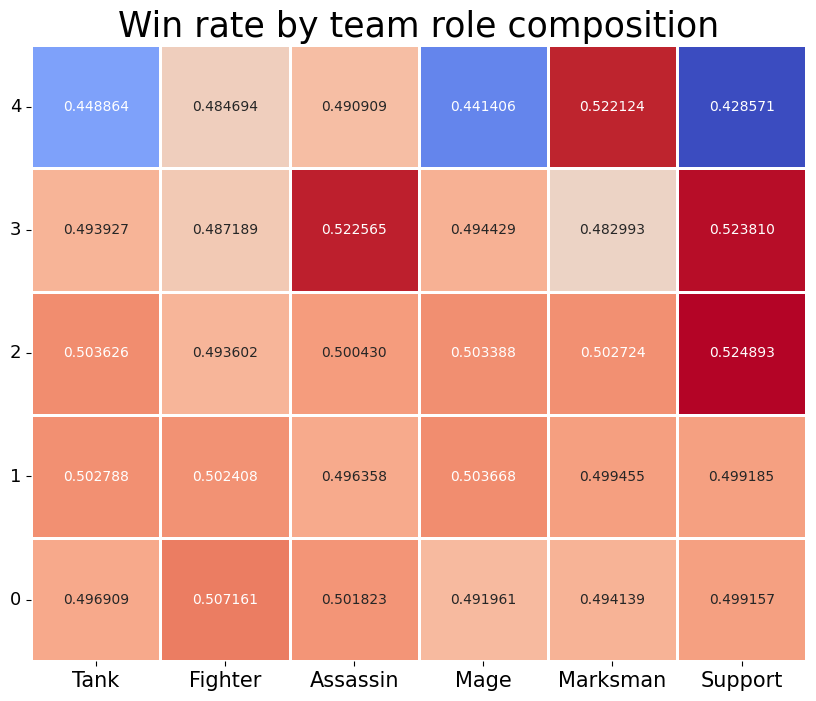

In [152]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(df_win, annot=True, linewidths=.8, cmap='coolwarm', fmt='.6f', annot_kws={"size":10}, cbar=False)
plt.autoscale()
plt.title('Win rate by team role composition', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(rotation=0, fontsize=13)
plt.gca().invert_yaxis()
plt.show()